# Time Series Forecasting - Stock Price Prediction

<center><b>Description for Stock Market Prices Data and Its Features:</b></center>
<hr>
Stock market data is financial market data relating to the historical, real time and future values of equities. 

<ul>
<li><b>Open</b> - The price the stock opened at.</li>
<li><b>High</b> - The highest price during the day.</li>
<li><b>Low</b> - The lowest price during the day.</li>
<li><b>Close</b> - The closing price on the trading day.</li>
<li><b>Adj Close</b> - The closing price after adjustments on the trading day.</li>
<li><b>Volume</b> - Number of shares traded.</li>
</ul>

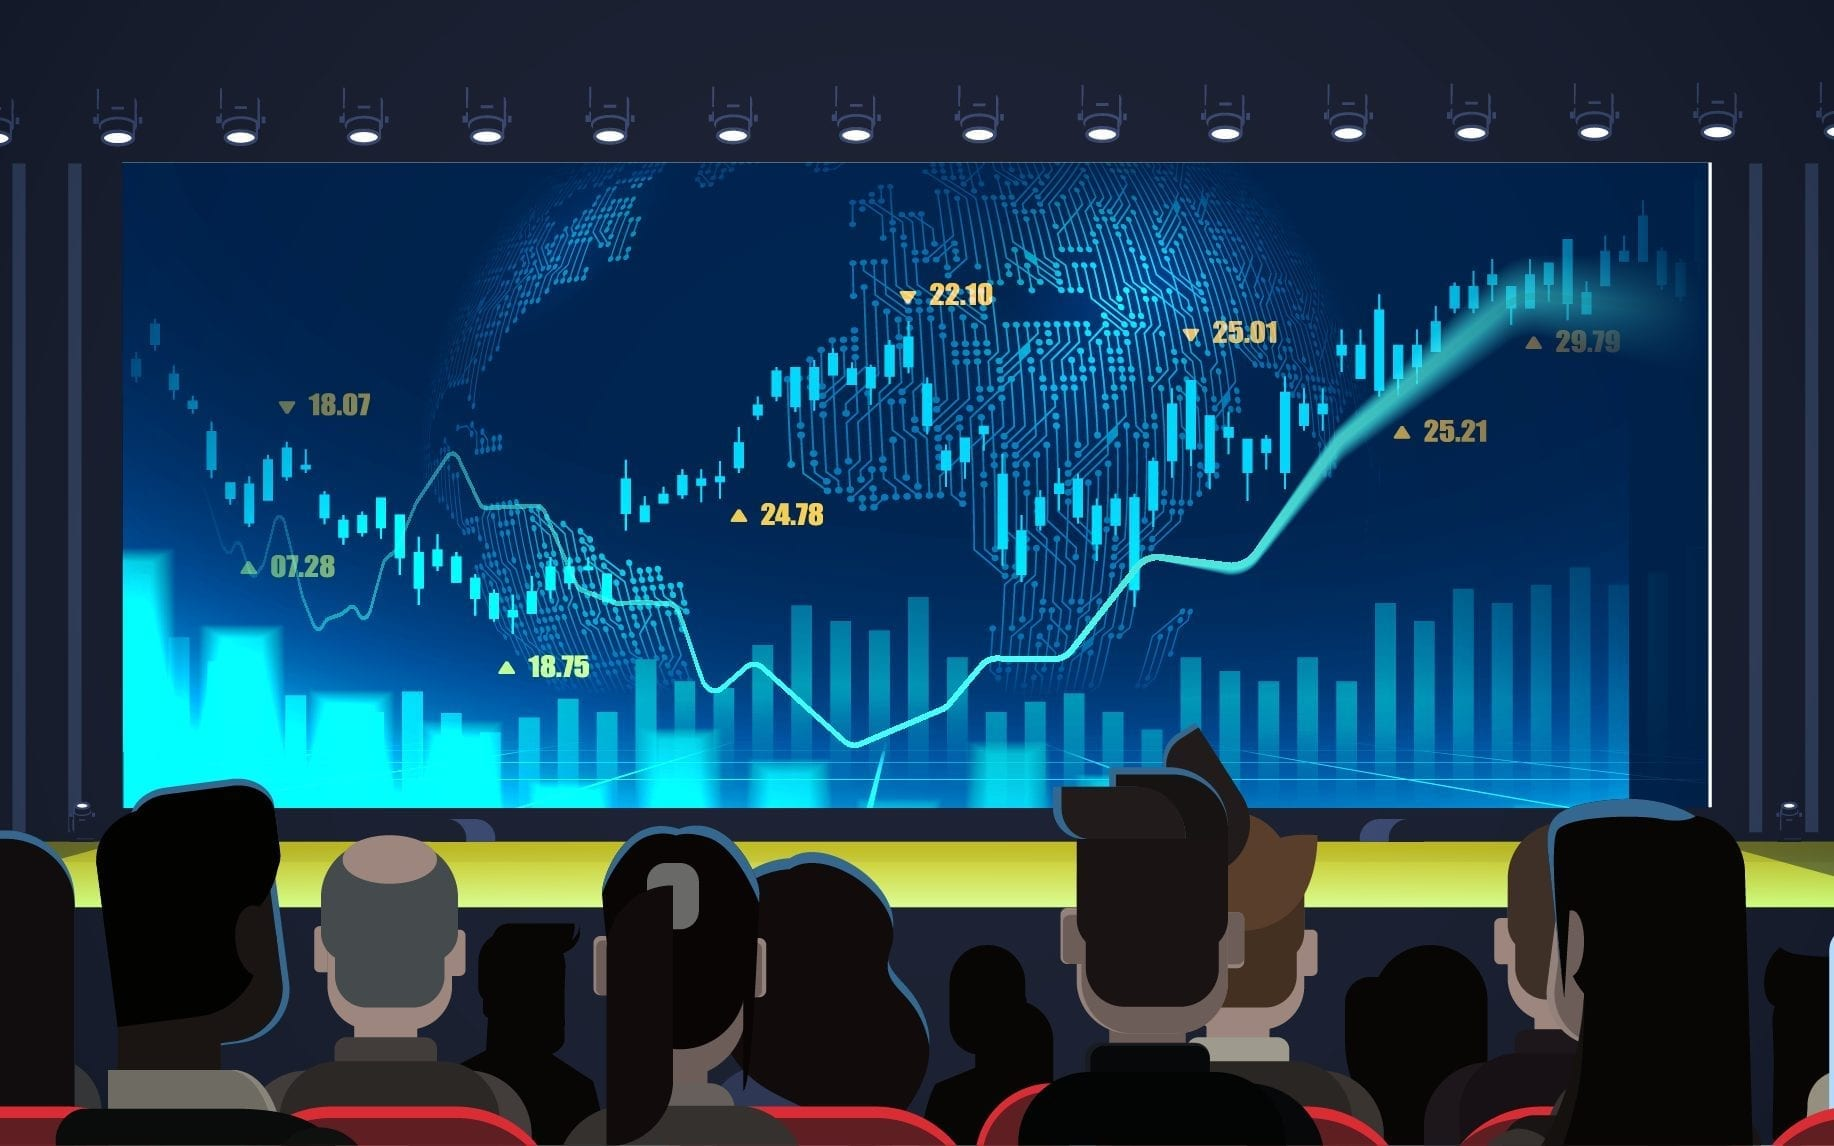

### Importing Libraries and Choosing a Stock from Top 50 American Companies

In [1]:
#importing all necessary libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
#import warnings
#warnings.filterwarnings('ignore')

#!pip install yfinance
import yfinance

In [2]:
top50 = pd.read_csv('Top50_American_Companies.csv')
print("------- Choose a Company with its ticker symbol from below list for Time Series Forecasting -------\n")
print(top50.head(50))

------- Choose a Company with its ticker symbol from below list for Time Series Forecasting -------

    ﻿Rank                      Company Name Ticker Symbol  Market Cap ($B)
0       1                        APPLE INC.          AAPL          2610.94
1       2             MICROSOFT CORPORATION          MSFT          2127.14
2       3                     ALPHABET INC.          GOOG          1356.39
3       4                  AMAZON.COM, INC.          AMZN          1097.20
4       5          BERKSHIRE HATHAWAY INC.,         BRK.A           722.62
5       6                NVIDIA CORPORATION          NVDA           669.84
6       7              Meta Platforms, Inc.          META           546.14
7       8                       TESLA, INC.          TSLA           523.19
8       9                         VISA INC.             V           481.33
9      10           EXXON MOBIL CORPORATION           XOM           470.92
10     11   UNITEDHEALTH GROUP INCORPORATED           UNH           451.33

In [3]:
def get_stock_ticker():
    ticker = input("Enter the Selected Company Ticker Symbol: ")
    ticker = str(ticker)
    return ticker

ticker = get_stock_ticker()

Enter the Selected Company Ticker Symbol: JPM


In [4]:
#Retrieving Stock Data for last 10 years
data = yfinance.download(tickers=ticker,start='2018-04-01', end='2023-05-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,109.959999,110.730003,106.080002,107.849998,92.371223,18822500
2018-04-03,108.360001,109.500000,107.260002,109.330002,93.638824,14050700
2018-04-04,107.099998,111.209999,107.019997,110.989998,95.060562,15302600
2018-04-05,111.629997,112.830002,111.389999,111.879997,96.308762,16627000
2018-04-06,110.550003,111.550003,107.820000,109.089996,93.907066,18906000


In [5]:
#Shape of the Data
data.shape

(1279, 6)

In [6]:
#Getting information about null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2018-04-02 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1279 non-null   float64
 1   High       1279 non-null   float64
 2   Low        1279 non-null   float64
 3   Close      1279 non-null   float64
 4   Adj Close  1279 non-null   float64
 5   Volume     1279 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.9 KB


In [7]:
data.index = pd.DatetimeIndex(data.index)

In [8]:
#Add returns to the dataframe 
Returns = data.pct_change().dropna()
Returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-03,-0.014551,-0.011108,0.011124,0.013723,0.013723,-0.253516
2018-04-04,-0.011628,0.015616,-0.002238,0.015183,0.015183,0.089099
2018-04-05,0.042297,0.014567,0.040834,0.008019,0.013131,0.086547
2018-04-06,-0.009675,-0.011344,-0.032050,-0.024937,-0.024937,0.137066
2018-04-09,-0.004885,0.012819,0.019199,0.012008,0.012008,-0.155067
...,...,...,...,...,...,...
2023-04-24,0.005152,-0.000071,0.009079,0.001352,0.001352,-0.360988
2023-04-25,-0.006123,-0.008079,-0.017209,-0.021744,-0.021744,0.404599
2023-04-26,-0.014183,-0.015362,-0.026375,-0.017724,-0.017724,0.356261


### Descriptive Statistics

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1279.0,1.242790e+02,2.136728e+01,8.156000e+01,1.081700e+02,1.178800e+02,1.389100e+02,1.727100e+02
High,1279.0,1.255491e+02,2.140365e+01,8.375000e+01,1.092400e+02,1.189000e+02,1.401300e+02,1.729600e+02
Low,1279.0,1.229943e+02,2.131766e+01,7.691000e+01,1.070250e+02,1.163200e+02,1.377900e+02,1.705400e+02
Close,1279.0,1.242686e+02,2.137137e+01,7.903000e+01,1.080300e+02,1.178500e+02,1.390800e+02,1.717800e+02
Adj Close,1279.0,1.154550e+02,2.289772e+01,7.148599e+01,9.503904e+01,1.119901e+02,1.348362e+02,1.640158e+02
Volume,1279.0,1.440600e+07,6.845342e+06,3.220500e+06,1.001935e+07,1.268180e+07,1.635795e+07,5.441880e+07


In [10]:
print("Minimum Adjusted Close recorded in last 10 years: ", round(data['Adj Close'].min(),3))
print("\nMaximum Adjusted Close recorded in last 10 years: ", round(data['Adj Close'].max(),3))
per_inc = (data['Adj Close'].iloc[data.shape[0]-1]-data['Adj Close'].iloc[0])/data['Adj Close'].iloc[0]*100
print("\nPercentage Increase for Adjusted Close recorded in last 10 years (4/2013 vs 3/2023 ): {}%".format(round(per_inc,2)))

Minimum Adjusted Close recorded in last 10 years:  71.486

Maximum Adjusted Close recorded in last 10 years:  164.016

Percentage Increase for Adjusted Close recorded in last 10 years (4/2013 vs 3/2023 ): 49.66%


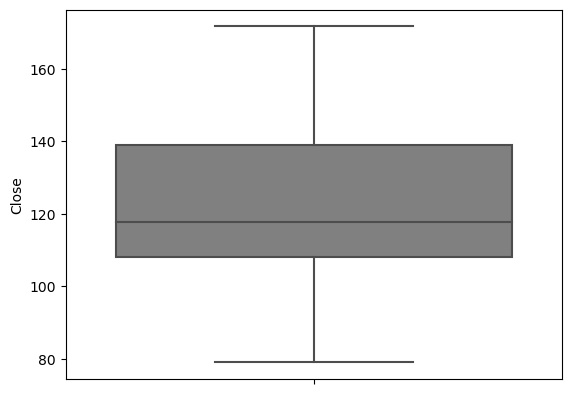

In [11]:
#Visualzing box plot for Adjusted Close column
sns.boxplot(y=data['Close'], color='grey')
plt.show()

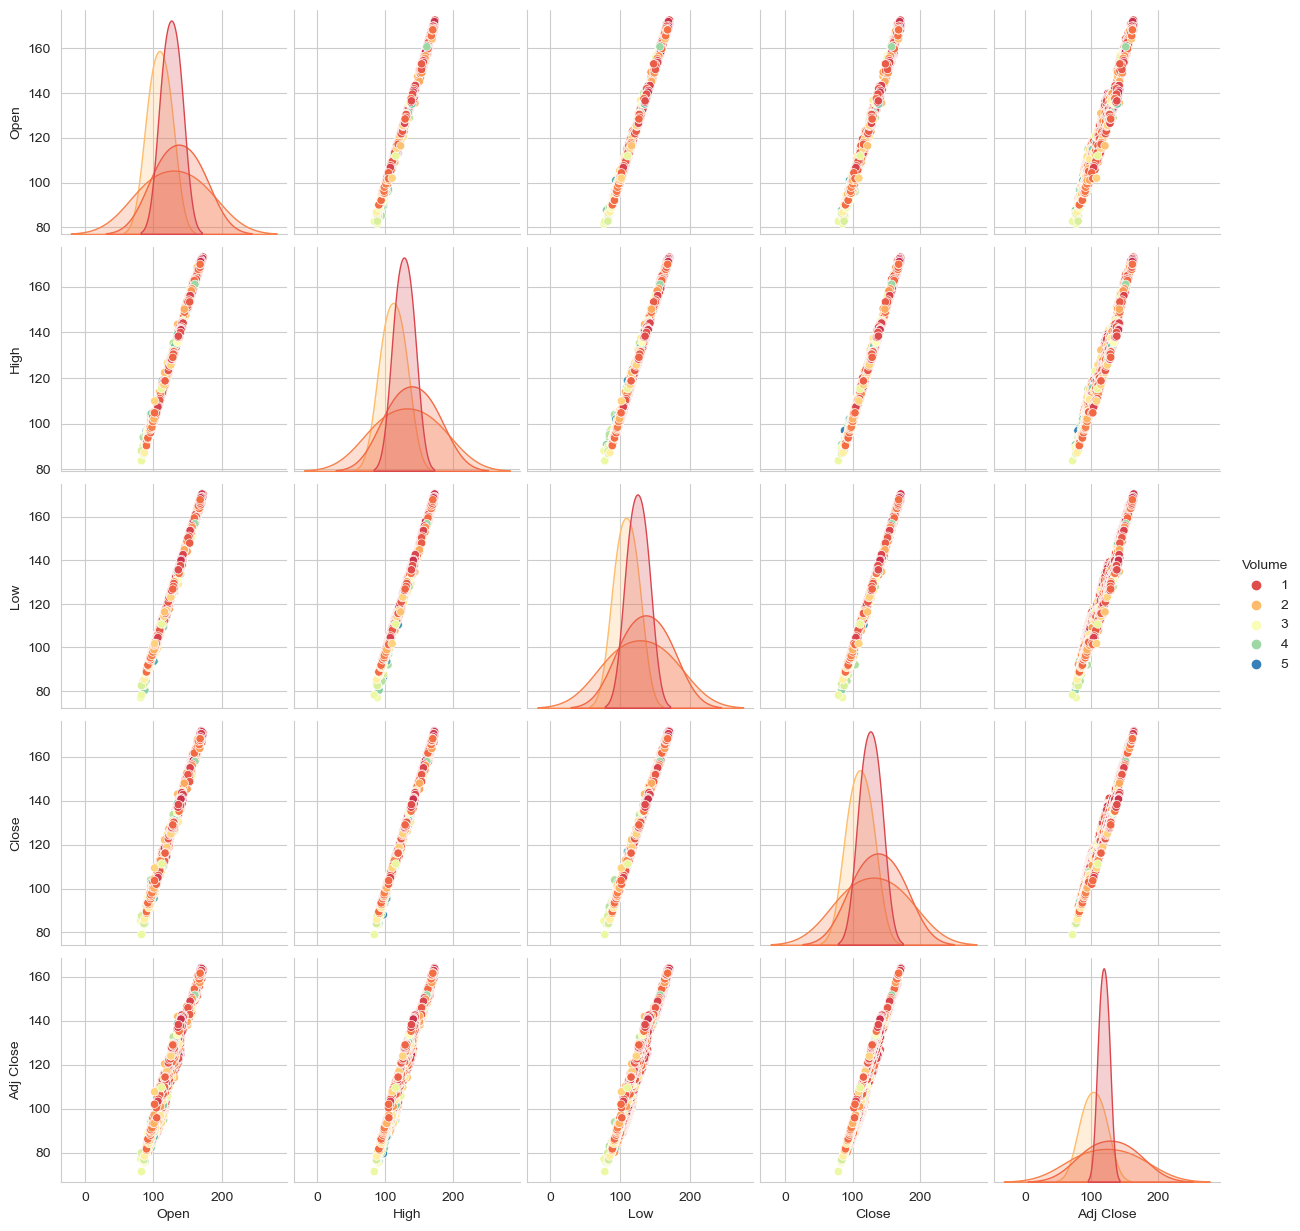

In [48]:
sns.pairplot(data, hue='Volume', palette='Spectral')

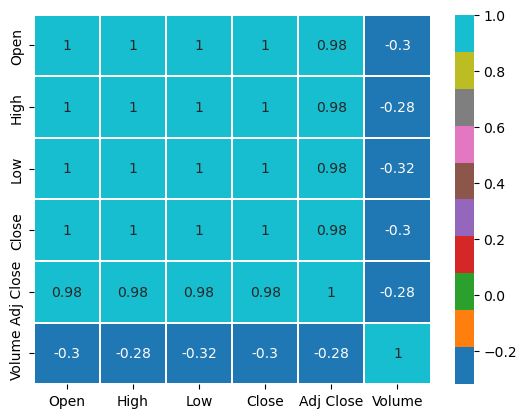

In [12]:
#finding correlation for the data
c=data.corr()
sns.heatmap(c, cmap='tab10', linewidths='0.05', annot=True)
plt.show()

<b><center>Except Volume all other columns are in perfect positive correlation with each other

## Moving Averages for this Data
The moving average is also known as the rolling mean and is calculated by averaging data of the time series within k periods of time. 

### 1. Simple Moving Average (SMA)

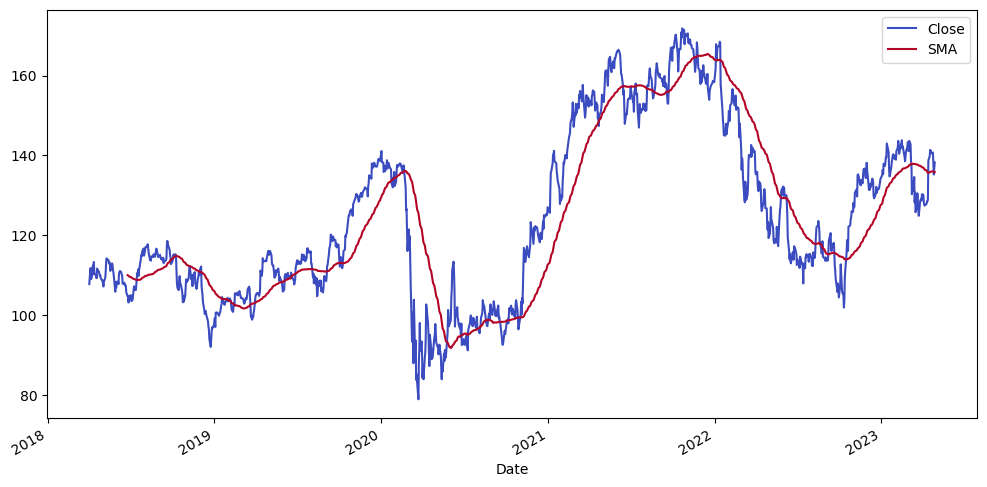

In [13]:
def Simple_Moving_Avg(df, feature, num_of_observations):
    
    #Using .to_frame to convert the column to Pandas.Series
    new_df = df[feature].to_frame()
    
    #Using rolling(window).mean() to calculate SMA
    #using window size  i.e, num of observations
    new_df['SMA'] = new_df[feature].rolling(num_of_observations).mean()
    
    #plotting SMA
    new_df.plot(figsize=(12,6), colormap='coolwarm')
    plt.show()
Simple_Moving_Avg(data, 'Close', 60)

### 2. Cummulative Moving Average (CMA)

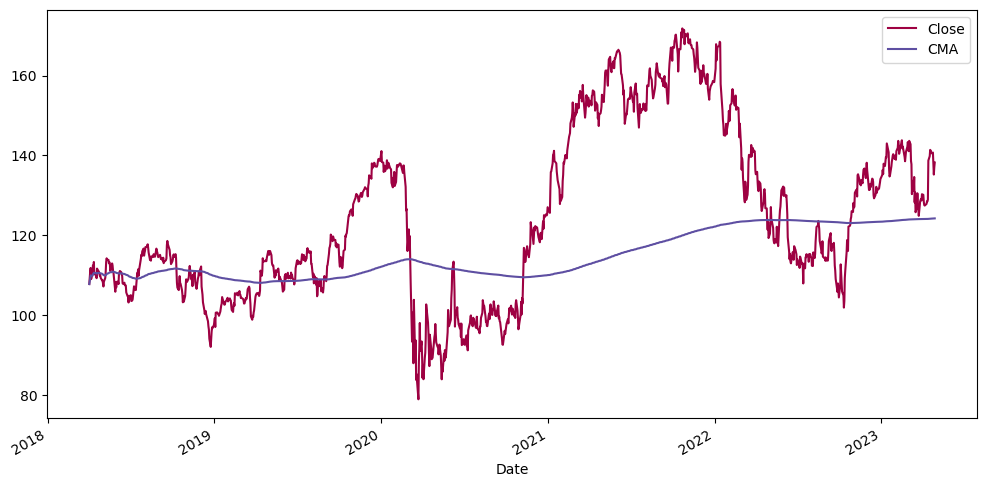

In [14]:
def Cum_Moving_Avg(df, feature):
    
    #Using .to_frame to convert the column to Pandas.Series
    new_df = df[feature].to_frame()
    
    #Using expanding().mean() to calculate CMA
    new_df['CMA'] = new_df[feature].expanding().mean()
    
    #plotting SMA
    new_df.plot(figsize=(12,6), colormap='Spectral')
    plt.show()
Cum_Moving_Avg(data, 'Close')

### 3. Exponential Moving Average (EMA)

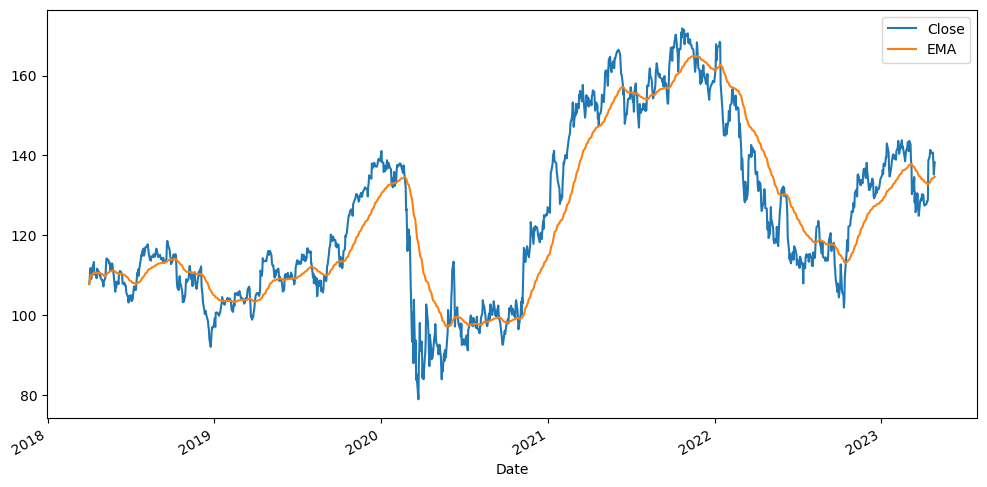

In [15]:
def Expo_Moving_Avg(df, feature, num_of_observations):
    
    #Using .to_frame to convert the column to Pandas.Series
    new_df = df[feature].to_frame()
    
    #Using ewn(span).mean() to calculate EMA
    #using span  i.e, num of observations
    new_df['EMA'] = new_df[feature].ewm(span=num_of_observations).mean()
    
    #plotting SMA
    new_df.plot(figsize=(12,6))
    plt.show()
Expo_Moving_Avg(data, 'Close', 60)

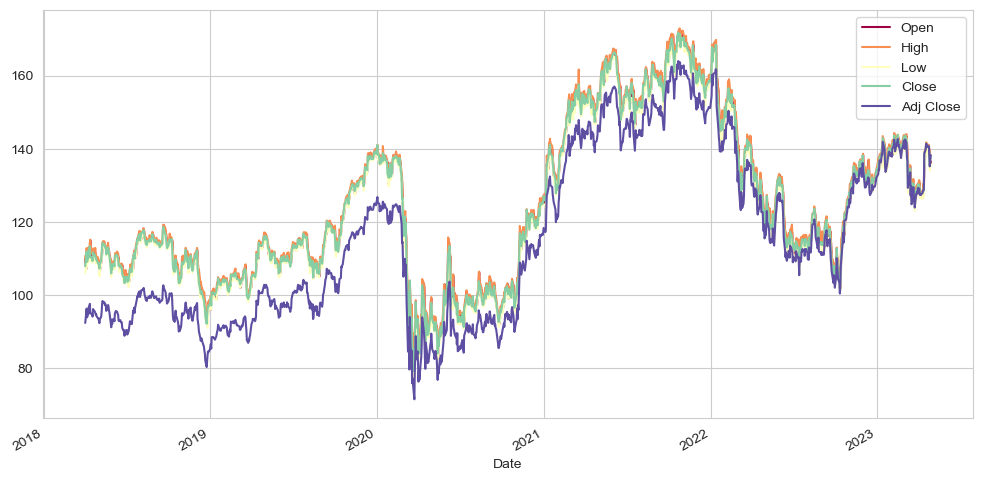

In [16]:
#Trends for priced variables
sns.set_style('whitegrid')
price_features = (data.drop(['Volume'], axis=1)).columns
data[price_features].plot(figsize=(12,6), colormap='Spectral')
plt.show()

## Time Series Decomposition

In [17]:
#Applying time series decomposition
def decompose_results(data, feature, model, period=180):
    
    df = data
    df.reset_index(inplace=True)
    df.set_index('Date', inplace=True) 
    df = df[feature]
 
    if model == 'additive':
        decompose_add = seasonal_decompose(df, model=model, period=period)
        plt.figure(figsize=(16,4))
        decompose_add.plot()
        plt.xlabel('Additive', fontsize=18)
        plt.show()

    elif model == 'multiplicative':
        decompose_mul = seasonal_decompose(df, model=model, period=period)
        plt.figure(figsize=(16,4))
        decompose_mul.plot()
        plt.xlabel('Multiplicative', fontsize=18)
        plt.show()

<Figure size 1600x400 with 0 Axes>

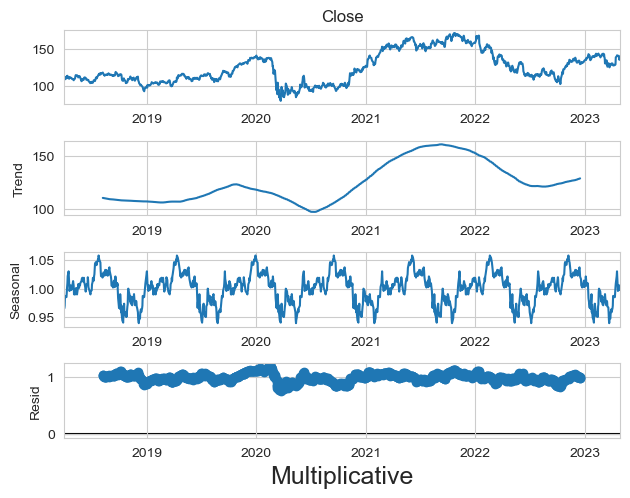

In [18]:
#Seasonal Decomposition with Open column
decompose_results(data, 'Close', 'multiplicative')

<Figure size 1600x400 with 0 Axes>

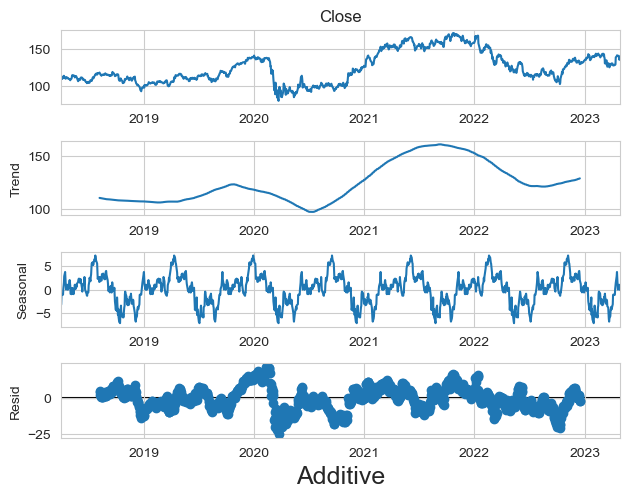

In [19]:
#Seasonal Decomposition with Close column
decompose_results(data, 'Close', 'additive')

## Auto Correlation using lag_plot() and plot_acf() functions

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

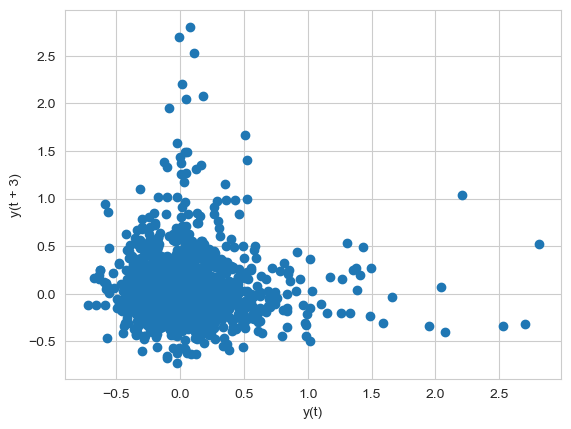

In [20]:
#lag_plot()
pd.plotting.lag_plot(Returns, lag=3)

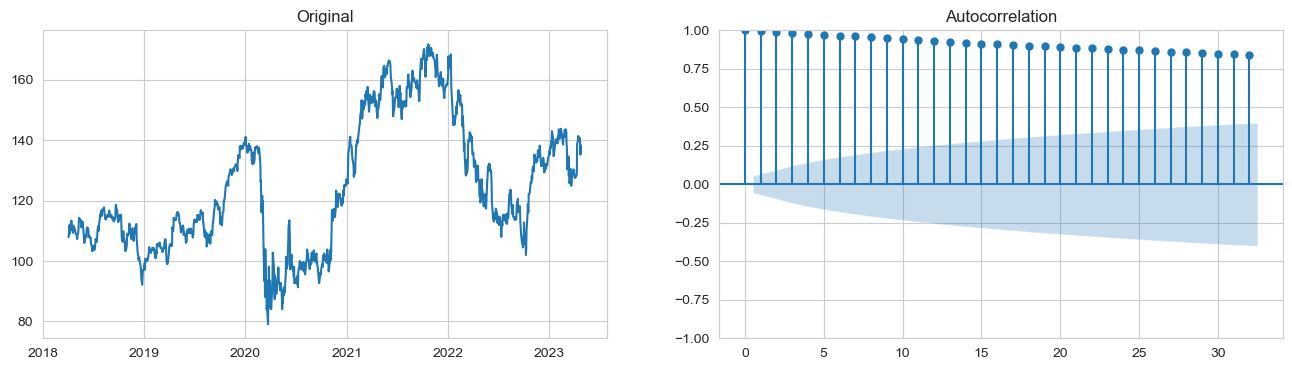

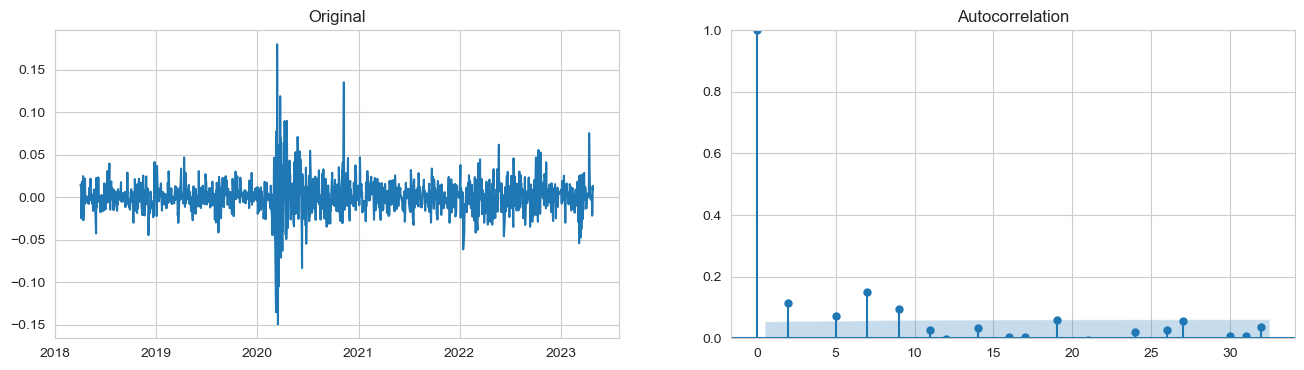

In [21]:
#q=2
#Plotting Auto Correlation using plt_acf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(data['Close'])
ax1.set_title('Original')
plot_acf(data['Close'], ax=ax2)
plt.show()

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16,4))

ax3.plot(Returns['Close'])
ax3.set_title('Original')
plot_acf(Returns['Close'], ax=ax4)
ax4.set_ylim(0,1)
plt.show()

<h3> Note: The partial autocorrelation function, like the ACF, indicates only the association between two data that the shorter lags between those observations do not explain. 

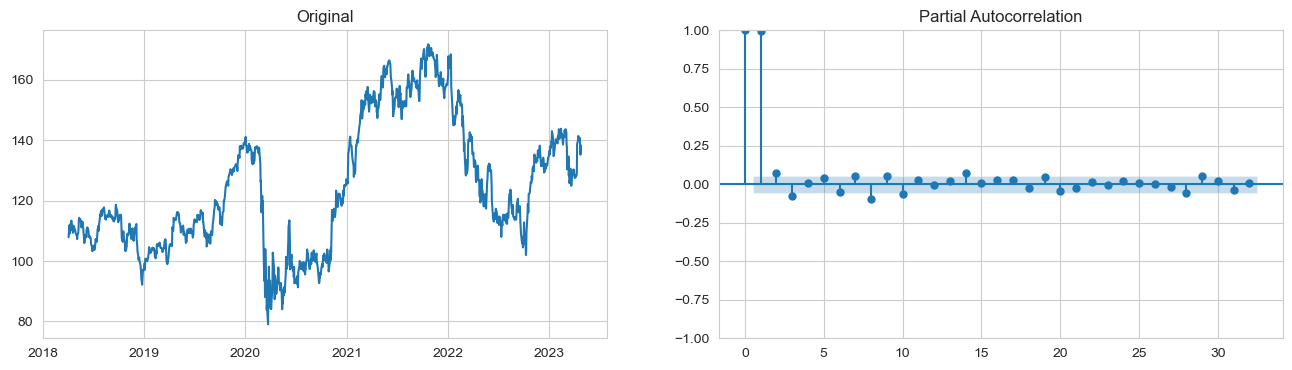

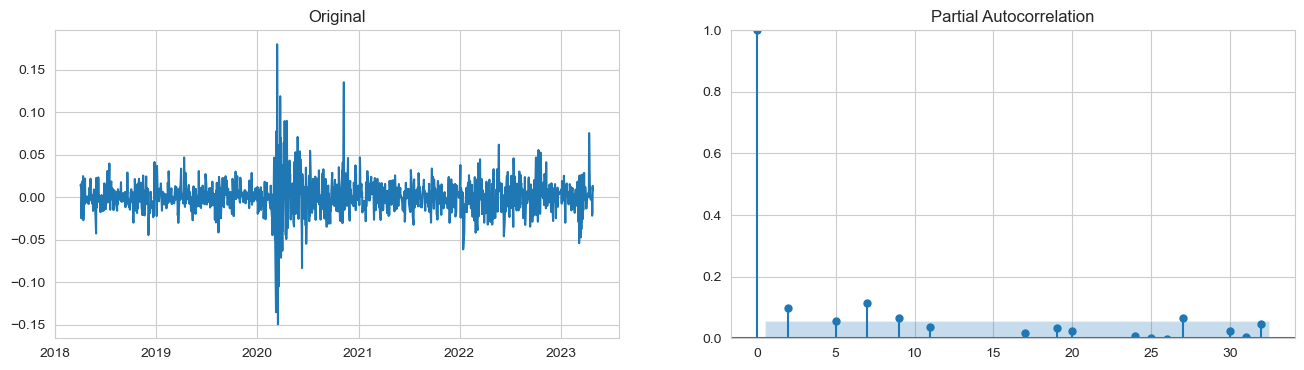

In [22]:
#p=7
#Plotting Auto Correlation using plt_pacf()
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16,4))

ax5.plot(data['Close'])
ax5.set_title('Original')
plot_pacf(data['Close'], ax=ax6, method='ywm')
plt.show()

fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(16,4))

ax7.plot(Returns['Close'])
ax7.set_title('Original')
plot_pacf(Returns['Close'], ax=ax8, method='ywm')
ax8.set_ylim(0,1)
plt.show()

<b> We can use pmdarima to get the number of differencing and ndiffs function is used to estimate ARIMA differencing term 'd'

In [23]:
from pmdarima.arima.utils import ndiffs
ndiffs(data.Close, test='adf')

1

## Augumented Dickey - Fuller Test
The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not.

In [24]:
adftest = adfuller(data['Close'],autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Test Statistic                   -1.796593
p-value                           0.382154
#Lags Used                       13.000000
Number of Observations Used    1265.000000
Critical Value (1%)              -3.435530
Critical Value (5%)              -2.863827
Critical Value (10%)             -2.567988
dtype: float64


<h4 align='center'>So, the data is not stationary as we can observe that p-value is higher than significance value.</h4>

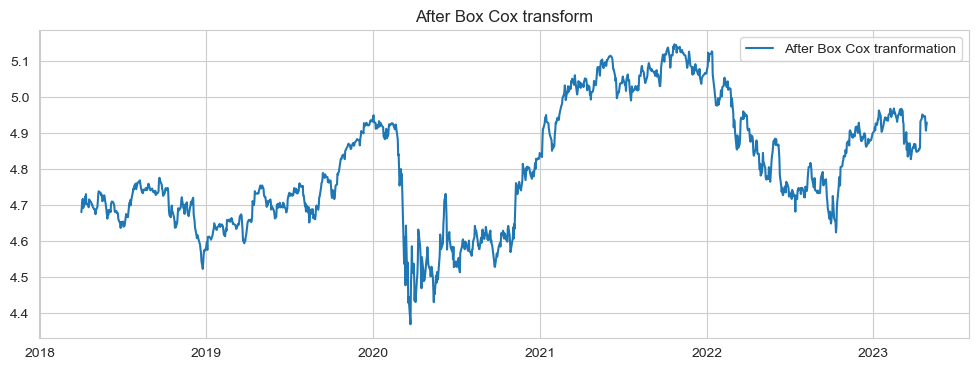

In [25]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Close'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

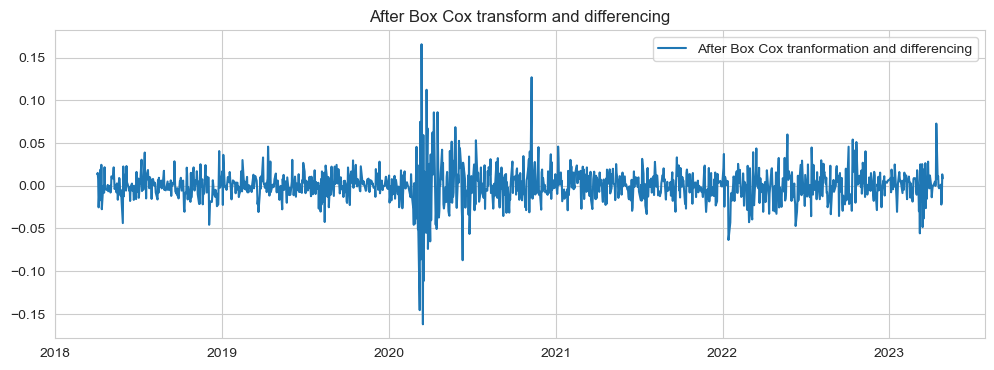

In [26]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [27]:
data_boxcox_diff.dropna(inplace=True)

In [28]:
adf_test1 = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test1[0])
print('Critical Values @ 0.05: %.2f' % adf_test1[4]['5%'])
print('p-value: %f' % adf_test1[1])

ADF Statistic: -9.632163
Critical Values @ 0.05: -2.86
p-value: 0.000000


<h2> Train_Test_Split

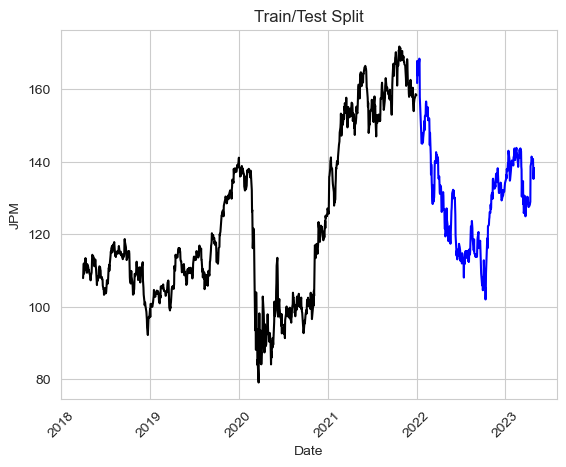

In [29]:
train = data[data.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

plt.plot(train.index, train['Close'], color = "black")
plt.plot(test.index, test['Close'], color = "blue") 
plt.ylabel(ticker)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split")
plt.show()

<h2>Holt Winter's multiplicative method with trend and seasonality

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
hwm['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.8866541673260788, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 108.55499521212437, 'initial_trend': 0.05271142113027826, 'initial_seasons': array([0.99490971, 0.99313605, 0.99227405, 0.99391657, 0.9928215 ,
       0.99534114, 0.99644682, 0.99768944, 1.00101302, 0.99987383,
       1.00020544, 1.000072  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


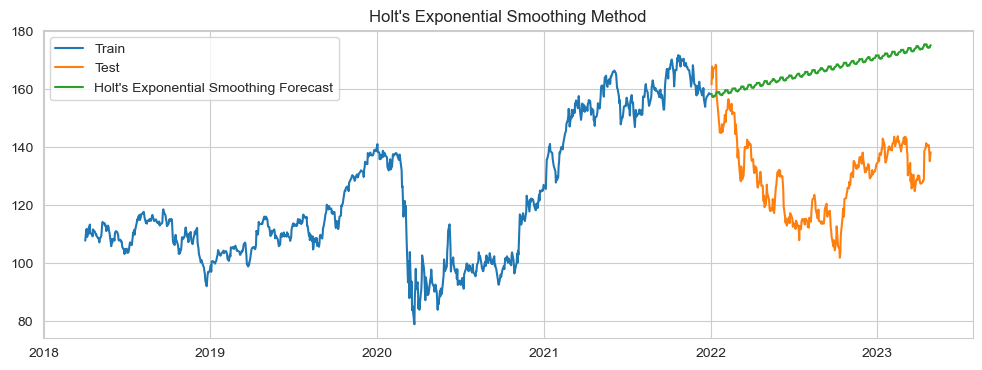

In [31]:
#pred = test.copy()
#y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))
plt.figure(figsize=(12,4))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(hwm['forecast'], label='Holt\'s Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(test['Close'], hwm['forecast'][test.index.min():])).round(3)
mape = np.round(np.mean(np.abs(test['Close']-hwm['forecast'][test.index.min():])/test['Close'])*100,3)

Results_hwm = pd.DataFrame({'Method':['Holt Winter\'s multiplicative method with trend and seasonality'], 'RMSE': [rmse],'MAPE': [mape]})
Results_hwm

,Method,RMSE,MAPE
0,Holt Winter's multiplicative method with trend...,39.349,29.598


<h3>ARIMA model

In [33]:
#resolving indices to ensure error free modelling
d=data.reset_index()
data.index=d['Date']

tr=train.reset_index()
train.index=tr['Date']

te=test.reset_index()
test.index=te['Date']

In [34]:
ar_model = ARIMA(test['Close'], order=(7,1,2))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  332
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -754.452
Date:                Tue, 09 May 2023   AIC                           1528.904
Time:                        22:31:49   BIC                           1566.925
Sample:                             0   HQIC                          1544.069
                                - 332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1195      0.258      0.463      0.643      -0.386       0.625
ar.L2          0.7881      0.197      3.991      0.000       0.401       1.175
ar.L3         -0.0470      0.072     -0.654      0.5

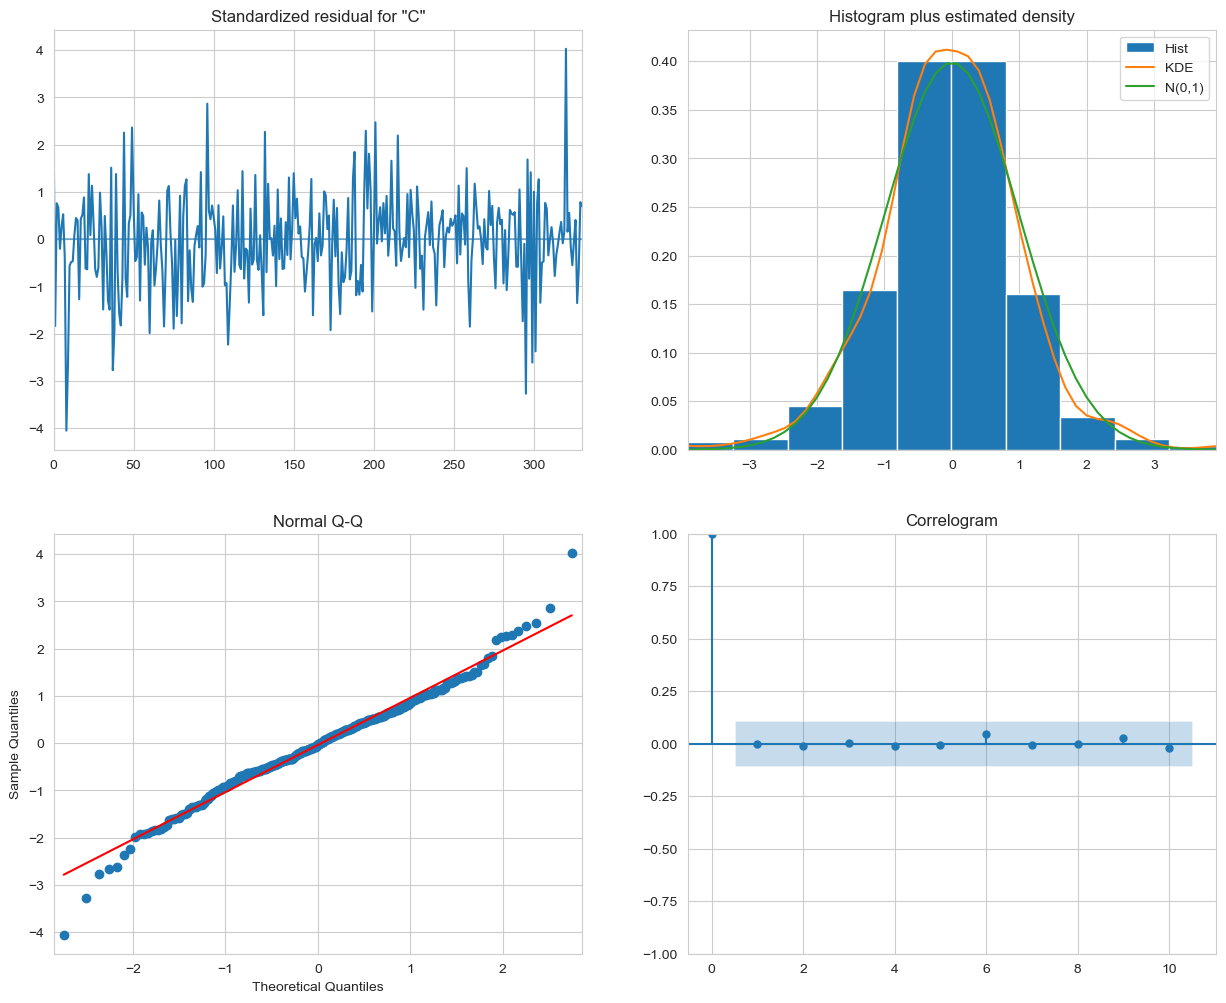

In [35]:
ar_model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

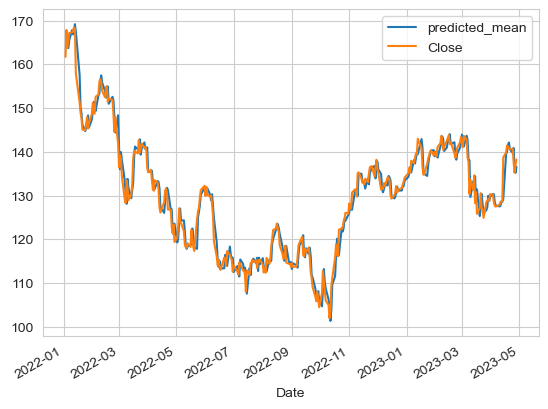

In [36]:
preds = ar_model_fit.predict()
preds[3:].plot()
test['Close'].plot()
plt.legend(loc='best')

In [37]:
rmse = np.sqrt(mean_squared_error(test['Close'], preds[test.index.min():])).round(3)
mape = np.round(np.mean(np.abs(test['Close']-preds[test.index.min():])/test['Close'])*100,3)

Results_ar = pd.DataFrame({'Method':['Autoregressive Integrated Moving Average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape]})
Results_ar

,Method,RMSE,MAPE
0,Autoregressive Integrated Moving Average (ARIM...,9.183,1.695


<h2>Optimization of the Model

<b>Adjusting parameters within your modeling function (#p - lagdays to use, #d - degree of differencing, #q - degree of seasonality)

### AutoRegression Method (only #p - lagdays to use) using ARIMA

In [38]:
#After some trials adjusting p,d,q, I have decided to use AutoRegression Method using ARIMA
areg_model = ARIMA(test['Close'], order=(7,0,0))
areg_model_fit = areg_model.fit()
print(areg_model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  332
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -760.477
Date:                Tue, 09 May 2023   AIC                           1538.954
Time:                        22:31:50   BIC                           1573.200
Sample:                             0   HQIC                          1552.611
                                - 332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.0078      6.365     21.212      0.000     122.533     147.483
ar.L1          1.0496      0.051     20.739      0.000       0.950       1.149
ar.L2         -0.0334      0.077     -0.437      0.6

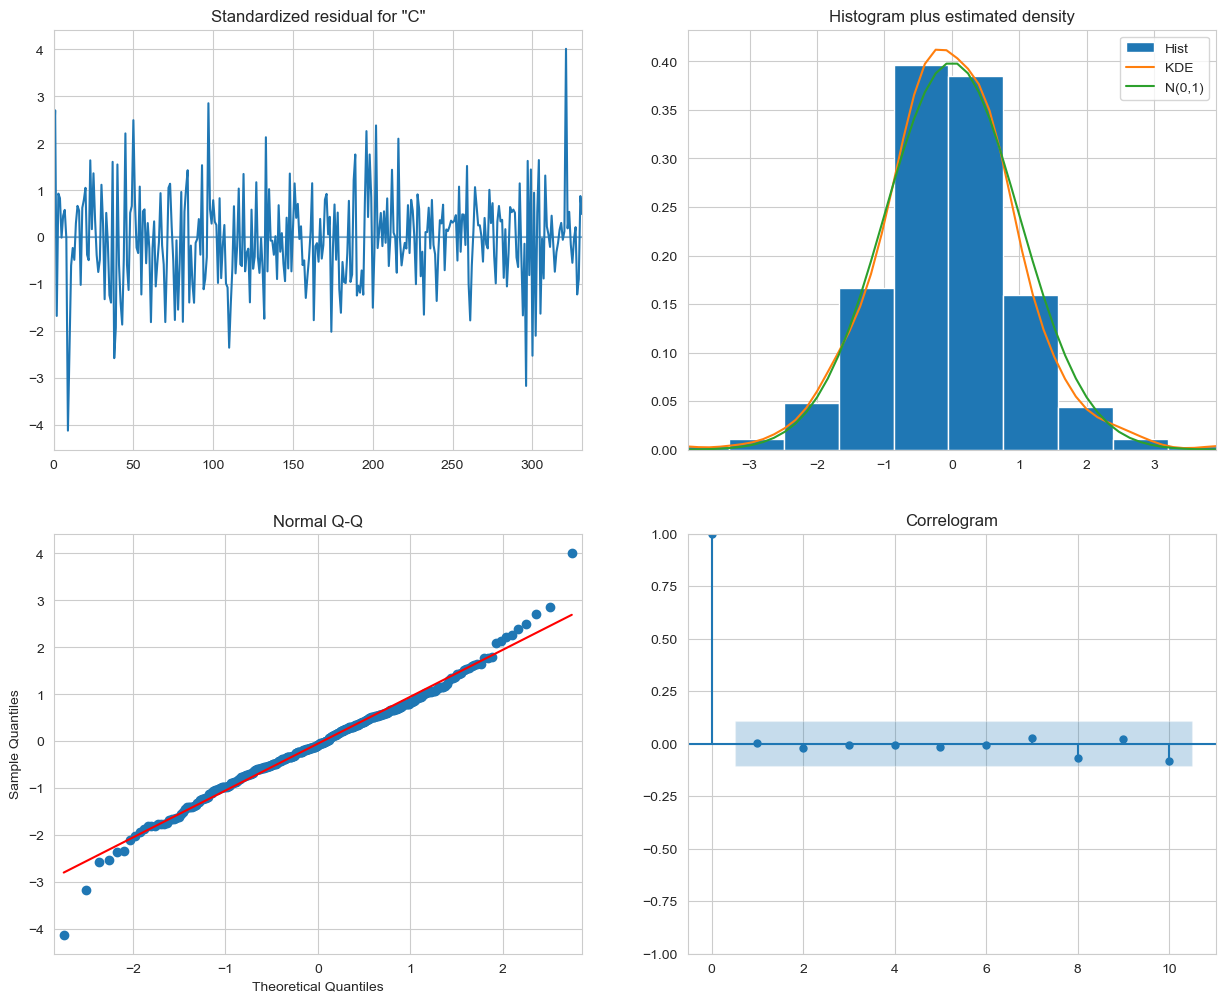

In [39]:
#plotting Diagnostics
areg_model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

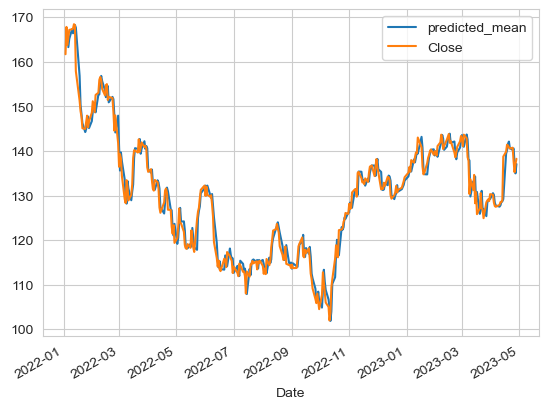

In [40]:
preds_areg = areg_model_fit.predict()
preds_areg[3:].plot()
test['Close'].plot()
plt.legend(loc='best')

In [41]:
rmse = np.sqrt(mean_squared_error(test['Close'], preds_areg[test.index.min():])).round(3)
mape = np.round(np.mean(np.abs(test['Close']-preds_areg[test.index.min():])/test['Close'])*100,3)

Results_areg = pd.DataFrame({'Method':['Autoregression (AR) method'], 'RMSE': [rmse],'MAPE': [mape]})
Results_areg

,Method,RMSE,MAPE
0,Autoregression (AR) method,2.783,1.455


In [42]:
#Presenting the results 
results = pd.concat([Results_hwm, Results_ar, Results_areg])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winter's multiplicative method with trend...,39.349,29.598
0,Autoregressive Integrated Moving Average (ARIM...,9.183,1.695
0,Autoregression (AR) method,2.783,1.455



# Summary:
<hr>

<b>Note: This Time Series Forecasting Project is generalized one which can accept any Stock data with its ticker which is present from 2018 to present.</b>

<b>
<ol>
   
<li> Considered Stock data among the top 50 American Companies which is JPMORGAN CHASE & CO.(Ticker='JPM').</li>
<li> Stock data is non-null data containing Date as its index.</li>
<li> The Inter-Quartile Range for Close column is 110-140 (approx).</li>
<li> There is considerable variation for Adjusted Close variable per Volume as compared to others.</li>
<li> Exponential Moving Average shows better fit than Cummulative and Simple Moving Averages.</li>
<li> Adjusted Close which has variation with other price columns earlier moved closer in recent years.</li>
<li> Additive decomposition showing high noise(resid) variablitiy.</li>
<li> Seasonality is observed with this stock data.</li>
<li> Degree of Seasonality(q) is considered as 2 by observing AutoCorrelation Plot.</li>
<li> Number of lags(p) can be considered 2 or 7 as there are spikes above the significance region for Parial AutoCorrelation plot.</li>
<li> After performing Augumented Dickey-Fuller test; p-value>0.05, So, the data is not stationary. Also boxcox transform to make it Stationary and its differencing is same as the plot for Returns Dataframe with Close variable.</li>
<li> Holt Winter's Multiplicative method with trend and seasonality has higher RMSE than ARIMA model.</li>
<li> Histogram for residuals in plot_dignostics has higher maximum density than Optimized model.</li>
<li> Mean Absolute Percentage Error reduced well between Holts Winter's method and ARIMA model.</li>
<li> Optimization of ARIMA Model is Autoregression model with only lags used and is the best model with low Root-Mean-Squared-Error.</li>
    </ol>
 </b>

<hr>
<h4 align='right'>- Jagadesh Varma Nadimpalli<h4>